In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import smile_extract
import logging
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [2]:
monkey = 'Sulley'
date = '2025-05-06'
data_dir = Path('/Users/raeed/Library/CloudStorage/OneDrive-UniversityofPittsburgh/0-projects/cst-rtt/cst-data/smile_format') / monkey / date
glob = data_dir.glob(f'{monkey}_{date}_*_sorted.mat')
smile_blocks = {file.name.split('_')[2]: smile_extract.direct_load_smile_data(str(file)) for file in glob}

In [12]:
state_targets = smile_extract.concat_block_trial_func_results(
    smile_extract.get_state_target_table,
    smile_blocks,
    # final_sampling_rate=1/pd.to_timedelta('10ms').total_seconds(),
)
state_targets

window                                                                  x  \
block              trial_id state                       target              
memory-cst-rtt-dco 1        Reach to Center             CenterSmall  45.0   
                            Hold Center (Small)         CenterSmall  45.0   
                            Hold Center (Ambiguous Cue) Center       45.0   
                            Hold Center (RTT Cue)       Center       45.0   
                            Hold Center (Memory)        Center       45.0   
...                                                                   ...   
                   399      Success                     None            0   
                            Center Failure              None            0   
                            Target Failure              None            0   
                            Abort                       Workspace      45   
                            Failure                     None            0   

window                                                                   y  \
block              trial_id state                       target               
memory-cst-rtt-dco 1        Reach to Center             CenterSmall  240.0   
                            Hold Center (Small)         CenterSmall  240.0   
                            Hold Center (Ambiguous Cue) Center       240.0   
                            Hold Center (RTT Cue)       Center       240.0   
                            Hold Center (Memory)        Center       240.0   
...                                                                    ...   
                   399      Success                     None             0   
                            Center Failure              None             0   
                            Target Failure              None             0   
                            Abort                       Workspace      240   
                            Failure                     None             0   

window                                                                 z  \
block              trial_id state                       target             
memory-cst-rtt-dco 1        Reach to Center             CenterSmall  0.0   
                            Hold Center (Small)         CenterSmall  0.0   
                            Hold Center (Ambiguous Cue) Center       0.0   
                            Hold Center (RTT Cue)       Center       0.0   
                            Hold Center (Memory)        Center       0.0   
...                                                                  ...   
                   399      Success                     None           0   
                            Center Failure              None           0   
                            Target Failure              None           0   
                            Abort                       Workspace      0   
                            Failure                     None           0   

window                                                              radius  \
block              trial_id state                       target               
memory-cst-rtt-dco 1        Reach to Center             CenterSmall    5.0   
                            Hold Center (Small)         CenterSmall    5.0   
                            Hold Center (Ambiguous Cue) Center        10.0   
                            Hold Center (RTT Cue)       Center        10.0   
                            Hold Center (Memory)        Center        10.0   
...                                                                    ...   
                   399      Success                     None            -1   
                            Center Failure              None            -1   
                            Target Failure              None            -1   
                            Abort                       Workspace      150   
                            Failure                     No

<Axes: xlabel='time', ylabel='x'>

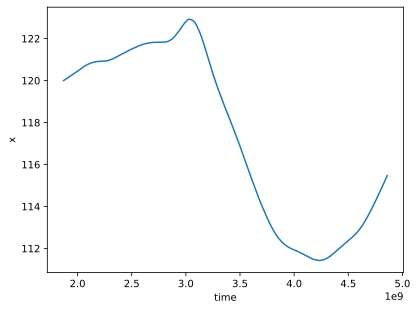

In [62]:
smile_blocks['reward-type-medium-cst-rtt-dco'][2]['TrialData']['Marker']['rawPositions'][227,:]
smile_blocks['reward-type-medium-cst-rtt-dco'][2]['TrialData']['Marker']['errorCursor']
temp = smile_extract.get_trial_cst_cursor(smile_blocks['reward-type-medium-cst-rtt-dco'][2])
sns.lineplot(data=temp, x='time',y='x')
# temp

In [66]:
smile_extract.concat_block_trial_func_results(smile_extract.get_trial_cst_cursor, smile_data_blocks=smile_blocks)

/Users/raeed/codebase/0-projects/smile-extraction/smile_extract/composition.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  return pd.concat(
/Users/raeed/codebase/0-projects/smile-extraction/smile_extract/composition.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(
/Users/raeed/codebase/0-projects/smile-extraction/smile_extract/composition.py:60: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when de

x  \
block                                trial_id time                                 
reward-type-medium-large-cst-rtt-dco 153      0 days 00:00:01.750000  120.000000   
                                              0 days 00:00:01.751000  120.005017   
                                              0 days 00:00:01.752000  120.009039   
                                              0 days 00:00:01.753000  120.012137   
                                              0 days 00:00:01.754000  120.014421   
...                                                                          ...   
reward-type-medium-cst-rtt-dco       152      0 days 00:00:04.266000  130.562304   
                                              0 days 00:00:04.267000  130.604743   
                                              0 days 00:00:04.268000  130.642549   
                                              0 days 00:00:04.269000  130.675084   
                                              0 days 00:00:04.270000  130.701937   

                                                                          y  \
block                                trial_id time                            
reward-type-medium-large-cst-rtt-dco 153      0 days 00:00:01.750000  900.0   
                                              0 days 00:00:01.751000  900.0   
                                              0 days 00:00:01.752000  900.0   
                                              0 days 00:00:01.753000  900.0   
                                              0 days 00:00:01.754000  900.0   
...                                                                     ...   
reward-type-medium-cst-rtt-dco       152      0 days 00:00:04.266000  900.0   
                                              0 days 00:00:04.267000  900.0   
                                              0 days 00:00:04.268000  900.0   
                                              0 days 00:00:04.269000  900.0   
                                              0 days 00:00:04.270000  900.0   

                                                                                z  
block                                trial_id time                                 
reward-type-medium-large-cst-rtt-dco 153      0 days 00:00:01.750000 -9000.000002  
                                              0 days 00:00:01.751000 -9000.000002  
                                              0 days 00:00:01.752000 -9000.000002  
                                              0 days 00:00:01.753000 -9000.000000  
                                              0 days 00:00:01.754000 -8999.999997  
...                                                                           ...  
reward-type-medium-cst-rtt-dco       152      0 days 00:00:04.266000 -8999.999997  
                                              0 days 00:00:04.267000 -9000.000000  
                                              0 days 00:00:04.268000 -9000.000002  
                                              0 days 00:00:04.269000 -9000.000002  
                                              0 days 00:00:04.270000 -9000.000002  

[627233 rows x 3 columns]

In [15]:
smile_blocks['reward-type-medium-cst-rtt-dco'][2]['Parameters']['TrialTargets']

{'names': array(['start', 'phasespace', 'start', 'start', 'tasktarget',
        'tasktarget_shape', 'tasktarget_shape2', 'tasktarget_word',
        'cst window', 'error cursor', 'start'], dtype=object),
 'window': array([[ 1.20000000e+02,  9.00000000e+02,  0.00000000e+00,
          1.00000000e+01,             nan,  1.00000000e+06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.20000000e+02,  9.00000000e+02,  0.00000000e+00,
          1.00000000e+01,             nan,  1.00000000e+06],
        [ 1.20000000e+02,  9.00000000e+02,  0.00000000e+00,
          1.00000000e+01,             nan,  1.00000000e+06],
        [ 1.20000000e+02,  9.00000000e+02,  0.00000000e+00,
          7.00000000e+00,             nan,  1.00000000e+06],
        [ 1.20000000e+02,  9.00000000e+02,  5.00000000e+00,
          0.00000000e+00,             nan,  1.00000000e+06],
        [ 1.20000000e+02,  9.00000000e+02,  1.50000000e+01,
 

In [12]:
smile_extract.concat_block_trial_func_results(
    trial_func=smile_extract.get_trial_targets,
    smile_data_blocks=smile_blocks,
)

x  \
block                                trial_id target name                         
reward-type-medium-large-cst-rtt-dco 153      start                  120.000000   
                                              phasespace               0.000000   
                                              tasktarget             120.000000   
                                              tasktarget_shape       120.000000   
                                              tasktarget_shape2      120.000000   
...                                                                         ...   
reward-type-choice                   858      reachtarget_shape_op    55.000000   
                                              reachtarget_shape2_op   55.000000   
                                              reachtarget_word_op     59.200001   
                                              choiceboundary1        185.000000   
                                              choiceboundary2         55.000000   

                                                                              y  \
block                                trial_id target name                         
reward-type-medium-large-cst-rtt-dco 153      start                  900.000000   
                                              phasespace               0.000000   
                                              tasktarget             900.000000   
                                              tasktarget_shape       900.000000   
                                              tasktarget_shape2      900.000000   
...                                                                         ...   
reward-type-choice                   858      reachtarget_shape_op   900.000000   
                                              reachtarget_shape2_op  900.000000   
                                              reachtarget_word_op    895.599976   
                                              choiceboundary1        900.000000   
                                              choiceboundary2        900.000000   

                                                                        z  \
block                                trial_id target name                   
reward-type-medium-large-cst-rtt-dco 153      start                   0.0   
                                              phasespace              0.0   
                                              tasktarget              0.0   
                                              tasktarget_shape        5.0   
                                              tasktarget_shape2      15.0   
...                                                                   ...   
reward-type-choice                   858      reachtarget_shape_op    5.0   
                                              reachtarget_shape2_op  15.0   
                                              reachtarget_word_op    25.0   
                                              choiceboundary1         0.0   
                                              choiceboundary2         0.0   

                                                                     radius  
block                                trial_id target name                    
reward-type-medium-large-cst-rtt-dco 153      start                    10.0  
                                              phasespace                0.0  
                                              tasktarget                7.0  
                                              tasktarget_shape          0.0  
                                              tasktarget_shape2         0.0  
...                                                                     ...  
reward-type-choice                   858      reachtarget_shape_op      0.0  
                                              reachtarget_shape2_op     0.0  
                                              reachtarget_word_op       0.0  
                                              choicebounda

In [9]:
temp = smile_extract.concat_block_func_results(
    smile_extract.get_smile_meta,
    smile_blocks,
)
temp

monkey session date      trial datetime  \
block              trial_id                                            
memory-cst-rtt-dco 1         Sulley   2025-05-06 2025-05-06 10:33:05   
                   2         Sulley   2025-05-06 2025-05-06 10:33:11   
                   3         Sulley   2025-05-06 2025-05-06 10:33:20   
                   4         Sulley   2025-05-06 2025-05-06 10:33:24   
                   5         Sulley   2025-05-06 2025-05-06 10:33:29   
...                             ...          ...                 ...   
                   395       Sulley   2025-05-06 2025-05-06 11:06:07   
                   396       Sulley   2025-05-06 2025-05-06 11:06:11   
                   397       Sulley   2025-05-06 2025-05-06 11:06:15   
                   398       Sulley   2025-05-06 2025-05-06 11:06:19   
                   399       Sulley   2025-05-06 2025-05-06 11:06:23   

                                     task   result  
block              trial_id                         
memory-cst-rtt-dco 1                  RTT  success  
                   2                  RTT  success  
                   3                  CST  failure  
                   4         MG LeftRight  success  
                   5                  CST  success  
...                                   ...      ...  
                   395                CST  success  
                   396       MG LeftRight  success  
                   397                CST  failure  
                   398                RTT  failure  
                   399       MG LeftRight  success  

[399 rows x 5 columns]

In [7]:
temp = smile_extract.concat_block_trial_func_results(
    smile_extract.get_trial_spike_times,
    smile_blocks,
    keep_sorted_only=True,
)
temp

channel  unit  \
block                                trial_id snippet_id                  
reward-type-medium-large-cst-rtt-dco 435      0                33     1   
                                              2                12     1   
                                              3                50     2   
                                              4                47     1   
                                              7                38     1   
...                                                           ...   ...   
reward-type-medium-cst-rtt-dco       434      27128           121     1   
                                              27129            64     2   
                                              27130           127     1   
                                              27131            81     1   
                                              27132            96     1   

                                                                        timestamp  
block                                trial_id snippet_id                           
reward-type-medium-large-cst-rtt-dco 435      0          -1 days +23:59:59.996000  
                                              2          -1 days +23:59:59.997000  
                                              3          -1 days +23:59:59.997000  
                                              4          -1 days +23:59:59.998000  
                                              7          -1 days +23:59:59.999000  
...                                                                           ...  
reward-type-medium-cst-rtt-dco       434      27128        0 days 00:00:09.547000  
                                              27129        0 days 00:00:09.547000  
                                              27130        0 days 00:00:09.548000  
                                              27131        0 days 00:00:09.548000  
                                              27132        0 days 00:00:09.548000  

[10319780 rows x 3 columns]

In [5]:
tf = smile_extract.compose_session_frame(smile_data,rate_artifact_threshold=1500,block=block)
tf

INFO:smile_extract.neural:Found 0 of 53 units with average firing rate less than 0.1 Hz.
DEBUG:smile_extract.neural:Units below minimum firing rate:
 Series([], Name: average firing rate, dtype: float64)
INFO:smile_extract.neural:Found 0 of 53 units with average firing rate greater than 1500 Hz.
DEBUG:smile_extract.neural:Units above maximum firing rate:
 Series([], Name: average firing rate, dtype: float64)
INFO:smile_extract.neural:Removing 0 of 990 trials with firing rate artifact above 1500 Hz.
DEBUG:smile_extract.neural:Trials removed:
 Index([], dtype='int64', name='trial_id')
INFO:smile_extract.neural:Removing 7 of 53 units with spike coincidence greater than 0.2.
DEBUG:smile_extract.neural:Units removed:
 MultiIndex([( 24, 1),
            ( 32, 1),
            (100, 1),
            (108, 1),
            (116, 1),
            (117, 1),
            (125, 1)],
           names=['channel', 'unit'])


channel                         monkey session date          block  \
signal                                                               
trial_id time                                                        
3        0 days 00:00:00          Prez   2025-03-18  memory-guided   
         0 days 00:00:00.010000   Prez   2025-03-18  memory-guided   
         0 days 00:00:00.020000   Prez   2025-03-18  memory-guided   
         0 days 00:00:00.030000   Prez   2025-03-18  memory-guided   
         0 days 00:00:00.040000   Prez   2025-03-18  memory-guided   
...                                ...          ...            ...   
990      0 days 00:00:02.870000   Prez   2025-03-18  memory-guided   
         0 days 00:00:02.880000   Prez   2025-03-18  memory-guided   
         0 days 00:00:02.890000   Prez   2025-03-18  memory-guided   
         0 days 00:00:02.900000   Prez   2025-03-18  memory-guided   
         0 days 00:00:02.910000   Prez   2025-03-18  memory-guided   

channel                              trial datetime  \
signal                                                
trial_id time                                         
3        0 days 00:00:00        2025-03-18 09:30:42   
         0 days 00:00:00.010000 2025-03-18 09:30:42   
         0 days 00:00:00.020000 2025-03-18 09:30:42   
         0 days 00:00:00.030000 2025-03-18 09:30:42   
         0 days 00:00:00.040000 2025-03-18 09:30:42   
...                                             ...   
990      0 days 00:00:02.870000 2025-03-18 10:30:40   
         0 days 00:00:02.880000 2025-03-18 10:30:40   
         0 days 00:00:02.890000 2025-03-18 10:30:40   
         0 days 00:00:02.900000 2025-03-18 10:30:40   
         0 days 00:00:02.910000 2025-03-18 10:30:40   

channel                                                 task   result  \
signal                                                                  
trial_id time                                                           
3        0 days 00:00:00         memory-guided-medium-reward  failure   
         0 days 00:00:00.010000  memory-guided-medium-reward  failure   
         0 days 00:00:00.020000  memory-guided-medium-reward  failure   
         0 days 00:00:00.030000  memory-guided-medium-reward  failure   
         0 days 00:00:00.040000  memory-guided-medium-reward  failure   
...                                                      ...      ...   
990      0 days 00:00:02.870000   memory-guided-small-reward  failure   
         0 days 00:00:02.880000   memory-guided-small-reward  failure   
         0 days 00:00:02.890000   memory-guided-small-reward  failure   
         0 days 00:00:02.900000   memory-guided-small-reward  failure   
         0 days 00:00:02.910000   memory-guided-small-reward  failure   

channel                                    state hand position              \
signal                                                       x           y   
trial_id time                                                                
3        0 days 00:00:00         Reach to Center     86.173323  902.142978   
         0 days 00:00:00.010000  Reach to Center     86.056044  902.060782   
         0 days 00:00:00.020000  Reach to Center     85.918988  901.991903   
         0 days 00:00:00.030000  Reach to Center     85.830760  901.917867   
         0 days 00:00:00.040000  Reach to Center     85.777065  901.828563   
...                                          ...           ...         ...   
990      0 days 00:00:02.870000   Target Failure     74.226984  897.394000   
         0 days 00:00:02.880000   Target Failure     74.226029  897.389620   
         0 days 00:00:02.890000   Target Failure     74.235413  897.396729   
         0 days 00:00:02.900000   Target Failure     74.239799  897.409587   
         0 days 00:00:02.910000   Target Failure     74.235375  897.413888   

channel                                     ... motor cortex                  \
signal                                   z  ...     

In [19]:
tf.groupby('trial_id').first()

channel  monkey session date          block      trial datetime  \
signal                                                            
trial_id                                                          
2          Prez   2025-03-19  memory-guided 2025-03-19 09:09:40   
3          Prez   2025-03-19  memory-guided 2025-03-19 09:09:44   
6          Prez   2025-03-19  memory-guided 2025-03-19 09:09:56   
7          Prez   2025-03-19  memory-guided 2025-03-19 09:10:00   
9          Prez   2025-03-19  memory-guided 2025-03-19 09:10:08   
...         ...          ...            ...                 ...   
852        Prez   2025-03-19  memory-guided 2025-03-19 10:12:47   
853        Prez   2025-03-19  memory-guided 2025-03-19 10:12:51   
854        Prez   2025-03-19  memory-guided 2025-03-19 10:12:55   
856        Prez   2025-03-19  memory-guided 2025-03-19 10:13:03   
857        Prez   2025-03-19  memory-guided 2025-03-19 10:13:07   

channel                           task   result            state  \
signal                                                             
trial_id                                                           
2         memory-guided-jackpot-reward  failure  Reach to Center   
3           memory-guided-large-reward  failure  Reach to Center   
6         memory-guided-jackpot-reward  failure  Reach to Center   
7         memory-guided-jackpot-reward  failure  Reach to Center   
9          memory-guided-medium-reward  success  Reach to Center   
...                                ...      ...              ...   
852         memory-guided-small-reward  failure  Reach to Center   
853         memory-guided-small-reward  failure  Reach to Center   
854         memory-guided-large-reward  failure  Reach to Center   
856        memory-guided-medium-reward  failure  Reach to Center   
857         memory-guided-small-reward  failure  Reach to Center   

channel  hand position                         ... motor cortex          \
signal               x           y          z  ...      ch112u1 ch113u1   
trial_id                                       ...                        
2            94.153178  900.728080  17.425566  ...            0       0   
3            91.938025  901.484160  13.463956  ...            3       2   
6            80.927176  898.320299  16.149761  ...            0       1   
7            86.616640  899.187649  22.022705  ...            0       2   
9           132.053290  909.193813  29.860305  ...            0       0   
...                ...         ...        ...  ...          ...     ...   
852          84.481588  892.750750  24.492252  ...            0       0   
853          84.451882  892.608768  24.551214  ...            0       0   
854          84.390813  892.431054  24.339664  ...            0       0   
856          84.357232  892.395215  24.305857  ...            0       0   
857          84.359612  892.411682  24.292269  ...            1       1   

channel                                                                   
signal   ch115u1 ch118u1 ch119u1 ch121u1 ch122u1 ch124u1 ch126u1 ch127u1  
trial_id                                                                  
2              2       0       0       1       1       1       1       1  
3              2       1       4       4       2       3       2       2  
6              2       1       0       0       0       1       0       0  
7              2       3       3       2       2       4       2       2  
9              0       5       0       0       1       1       1       0  
...          ...     ...     ...     ...     ...     ...     ...     ...  
852            0       0       0       1       0       0       0       0  
853            0       0       0       0       0       0       0       0  
854            0       0       1       0       1       1       0       0  
856            0       0       0       0       0       0       0       0  
857            0       0       1       0       0       0       0       0  

[564 r

In [71]:
trial_info = smile_extract.get_smile_meta(smile_data)
reward_cue_results = pd.concat(
    {
        'reward cue': trial_info['task'].map(lambda y: y.split('-')[2]),
        'success': trial_info['result'].map({'success':1,'failure':0}),
    },
    axis=1,
)
reward_cue_results

reward cue  success
trial_id                    
1            medium        0
2             large        0
3            medium        0
4             large        0
5             large        0
...             ...      ...
986          medium        0
987          medium        0
988          medium        0
989           small        0
990           small        0

[990 rows x 2 columns]

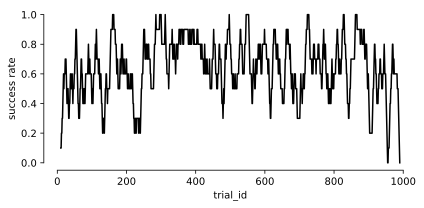

In [ ]:
reward_cue_results = (
    smile_extract.get_smile_meta(smile_data)
    .assign(**{
        'reward cue': lambda x: x['task'].map(lambda y: y.split('-')[2]),
        'success': lambda x: x['result'].map({'success':1,'failure':0}),
    })
    [['reward cue','success']]
)

g = sns.relplot(
    data=(
        reward_cue_results
        ['success']
        .rolling(10)
        .mean()
        .rename('success rate')
        .reset_index()
    ),
    x='trial_id',
    y='success rate',
    kind='line',
    aspect=2,
    height=3,
    color='black',
)
sns.despine(g.figure,trim=True)

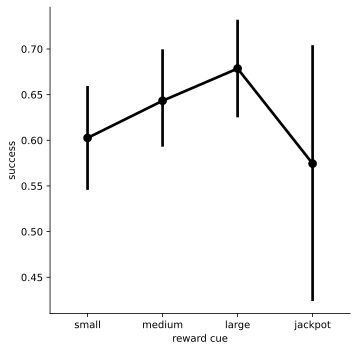

In [68]:
reward_cue_results = (
    smile_extract.get_smile_meta(smile_data)
    .assign(**{
        'reward cue': lambda x: x['task'].map(lambda y: y.split('-')[2]),
        'success': lambda x: x['result'].map({'success':1,'failure':0}),
    })
    [['reward cue','success']]
)

g = sns.catplot(
    data=(
        reward_cue_results
    ),
    x='reward cue',
    y='success',
    order=['small','medium','large','jackpot'],
    kind='point',
    color='black',
    estimator=np.mean,
    errorbar='ci',
)

In [104]:
smile_extract.states.get_trial_state_transition_table(smile_data[0])


target pass condition              interval  \
state                                                                          
Reach to Center          TouchbarCircle          enter      Start Trial Fail   
Center Hold              TouchbarCircle           hold         Center Hold 1   
Reach Target On          TouchbarCircle           hold       Target Flash MG   
Center Hold 2            TouchbarCircle           hold      Center Hold 2 MG   
Cheat Period             TouchbarCircle           hold              No cheat   
Reach to Target   ReachTargetTouchbarMG          enter  Time to Reach Target   
Target Hold       ReachTargetTouchbarMG           hold        Target Hold HC   
Success                            None           hold         Medium Reward   
Failure (Center)                   None           hold       Failure Penalty   
Target Failure                     None           hold       Failure Penalty   

                       pass state        fail state  
state                                                
Reach to Center       Center Hold  Failure (Center)  
Center Hold       Reach Target On   Reach to Center  
Reach Target On     Center Hold 2  Failure (Center)  
Center Hold 2        Cheat Period  Failure (Center)  
Cheat Period      Reach to Target  Failure (Center)  
Reach to Target       Target Hold    Target Failure  
Target Hold               Success    Target Failure  
Success            Target Failure    Target Failure  
Failure (Center)   Target Failure    Target Failure  
Target Failure     Target Failure    Target Failure

In [ ]:
targ_loc = (
    smile_extract.get_trial_targets(smile_data[0])
    .loc['reachtargettouchbarmg',['x','y']]
)

center_loc = (
    smile_extract.get_trial_targets(smile_data[0])
    .loc['touchbarcircle',['x','y']]
)

relative_target_loc = targ_loc-center_loc

np.atan2(*(relative_target_loc.rename({'x':'x2','y':'x1'})))

np.float64(0.0)

In [56]:
spike_times = smile_extract.get_smile_spike_times(smile_data)
recording_duration = (
    spike_times
    .groupby('trial_id')
    ['timestamp']
    .agg(np.ptp)
    .sum()
)
min_firing_rate = 10
average_firing_rate = (
    spike_times
    .groupby(['channel','unit'])
    ['timestamp']
    .agg('count')
    .apply(lambda x: x / recording_duration.total_seconds())
)
(
    spike_times
    .reset_index()
    .set_index(['channel','unit'])
    .loc[average_firing_rate > min_firing_rate]
    .reset_index()
    .set_index(['trial_id','snippet_id'])
)

Removing 49 of 138 units with average firing rate less than 10 Hz.


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

spike_times = smile_extract.get_smile_spike_times(smile_data)
binned_spikes = smile_extract.bin_spikes(spike_times, bin_size='1ms')

uncoincident = (
    spike_times
    .pipe(smile_extract.remove_correlated_units)
    .pipe(smile_extract.bin_spikes, bin_size='1ms')
)
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(np.corrcoef(binned_spikes.T),ax=ax[0])
sns.heatmap(np.corrcoef(uncoincident.T),ax=ax[1])

<Axes: >

In [21]:
coincident_units

MultiIndex([( 45, 1),
            ( 48, 1),
            ( 54, 1),
            ( 55, 1),
            ( 70, 1),
            ( 71, 1),
            ( 72, 1),
            (101, 1),
            (102, 1),
            (109, 1),
            (110, 1),
            (121, 1),
            (121, 2),
            (123, 1)],
           names=['channel', 'unit'])

In [ ]:
import altair as alt

alt.data_transformers.enable(max_rows=10000)
raster = (
    alt.Chart(
        tf
        .loc[152,'motor cortex']
        .stack()
        .rename('spikes')
        .loc[lambda x: x > 0]
        .reset_index()
        .assign(time=lambda x: x['time'].dt.total_seconds())
    ).mark_tick().encode(
        x='time:Q',
        y=alt.Y('signal:N').axis(labels=False,ticks=False).title('Neuron'),
    )
    .configure_tick(
        bandSize=2,
        thickness=0.5,
        color='black',
    )
    .configure_axis(
        grid=False,
    )
    .properties(width=800, height=200)
)
tf.loc[1,'motor cortex'].stack().rename('spikes').loc[lambda x: x > 0]
raster

In [ ]:
from src.extract_smile_data import get_smile_meta

temp = get_smile_meta(smile_data)
temp.groupby(['task','result']).size()
temp

In [ ]:
from src.extract_smile_data import get_trial_events,concat_trial_func_results

events=concat_trial_func_results(get_trial_events, smile_data)
(
    get_trial_events(smile_data[0])
    .reset_index(level='event')
    .set_index('time')
    .resample('10ms')
    .ffill()
    .rename(columns={'event':'state'})
    .squeeze()
)

In [ ]:
from src.extract_smile_data import get_trial_spike_times,bin_spikes,concat_trial_func_results

spike_times = concat_trial_func_results(
    get_trial_spike_times,
    smile_data,
    keep_sorted_only=True,
)
bin_spikes(spike_times)
spike_times

In [ ]:
smile_data[20]['TrialData']['stateTransitions'].T

In [ ]:
pd.DataFrame(smile_data[20]['Parameters']['StateTable']).columns
#pd.DataFrame(smile_data[0]['Parameters']['StateTable'])['stateName']
smile_data[21]['Parameters']['StateTable'][3]['stateName']

In [ ]:
import numpy as np
import altair as alt
from src.extract_smile_data import get_trial_hand_data,concat_trial_func_results

hand_data = concat_trial_func_results(
    get_trial_hand_data,
    smile_data,
    final_sampling_rate=100,
)

def sig_chart(df, **kwargs):
    return (
        alt.Chart(
            df
            .loc[:'0.2s']
            .reset_index()
            .assign(time=lambda x: x['time'].dt.total_seconds())
        )
        .mark_line(
            point='transparent',
            **kwargs
        )
        .encode(
            x='time:Q',
            y=alt.Y('x:Q').scale(zero=False),
        )
    )

(
    # sig_chart(marker_pos_df, color='black')
    # +
    sig_chart(hand_data.loc[1], color='blue')
)

In [ ]:
1/pd.to_timedelta('10ms').total_seconds()

In [ ]:
hand_data

In [ ]:
from src.extract_smile_data import get_spike_waveforms
from sklearn.decomposition import PCA
import altair as alt

waveforms = get_spike_waveforms(smile_data)

channel_waveforms = (
    waveforms
    .groupby('channel')
    .get_group(96)
    .rename(columns=lambda x: str(x))
)

channel_waveform_pca = pd.DataFrame(
    PCA(n_components=2)
    .fit_transform(
        channel_waveforms
    ),
    columns=['PC1','PC2'],
    index=channel_waveforms.index,
)

channel_waveforms = channel_waveforms.assign(**channel_waveform_pca)

sampled_waveforms = (
    channel_waveforms
    .sample(n=500)
    .reset_index()
)

# alt.data_transformers.enable('json')
selection = alt.selection_interval()

scatter = (
    alt.Chart(sampled_waveforms)
    .mark_point()
    .encode(
        x='PC1:Q',
        y='PC2:Q',
        color=alt.condition(
            selection,
            'unit:N',
            alt.value('lightgray'),
        ),
    )
    .add_selection(
        selection
    )
)

waveforms = (
    alt.Chart(sampled_waveforms)
    .mark_line()
    .encode(
        x='frame:Q',
        y='amplitude:Q',
        color=alt.condition(
            selection,
            'unit:N',
            alt.value('lightgray'),
        ),
        detail='snippet_id:O',
    )
    .transform_fold(
        [str(i) for i in range(30)],
        as_=['snippet_frame','amplitude'],
    )
    .transform_calculate(
        frame='toNumber(datum.snippet_frame)',
    )
)
scatter | waveforms

In [ ]:
tf